In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Image

## Q1-1

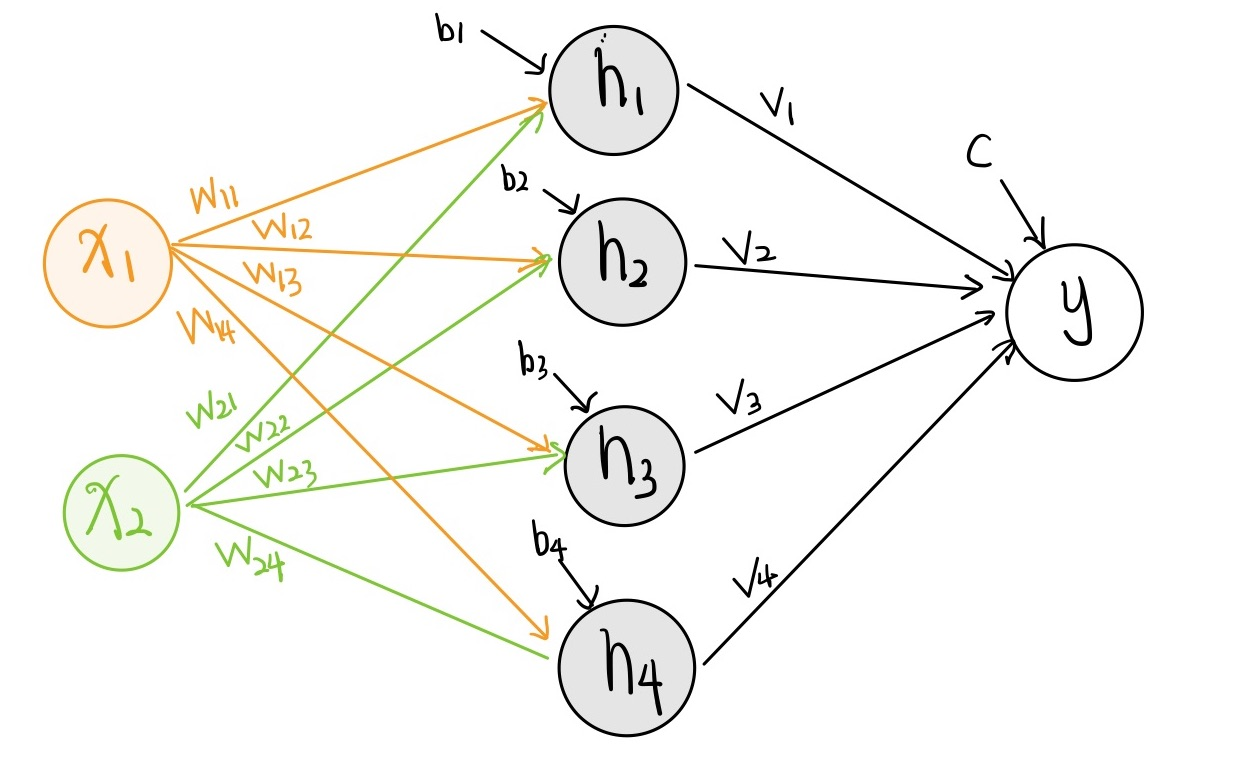

In [18]:
Image("1-1.jpg", width=500, height=500)

## Q1-2

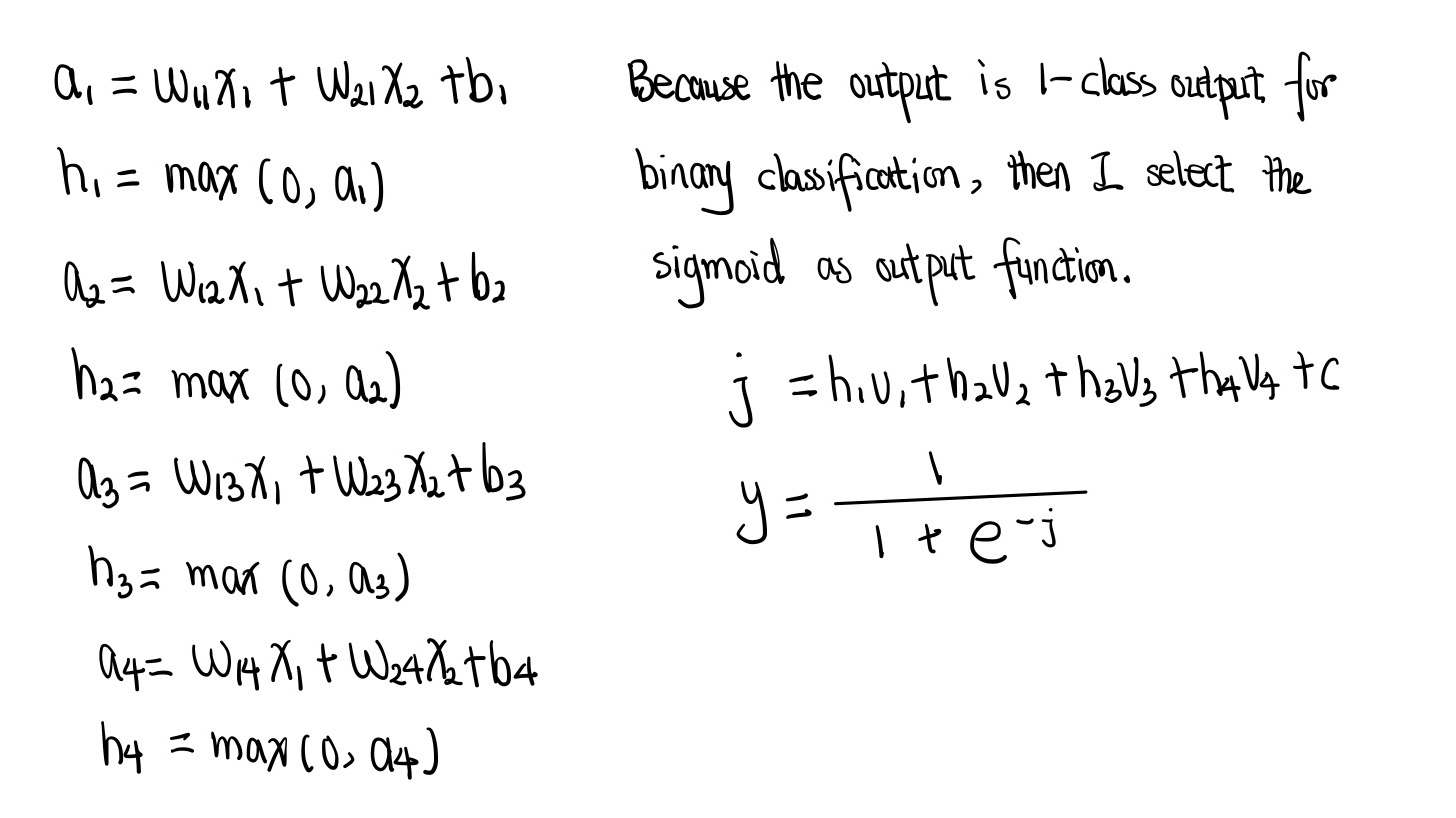

In [19]:
Image("1-2.jpg", width=500, height=500)

## Q1-3

In [ ]:
def nn_layer(x, w, b, f):
    return f(x@w + b)

def ff_nn_ReLu(x, params):
    h = nn_layer(x, params[0], params[1], tf.nn.relu)
    yhat = nn_layer(h, params[2], params[3], tf.nn.sigmoid)
    return yhat

## Q1-4

In [ ]:
x = np.matrix([[1, -1], [0, -1], [0,1]])
w = np.matrix([[1, -1, 0, 1], [0, 0, 0.5, 1]])
b = np.matrix([0, 0, 1, 0])
v = np.matrix([1, 0, -1, 1]).T
c = np.matrix([1])
yhat = ff_nn_ReLu(x, [w, b, v, c])

print("For each sample, the class probabilities are {}, {} and {}".format(yhat[0][0], yhat[1][0], yhat[2][0]))

## Q2-1

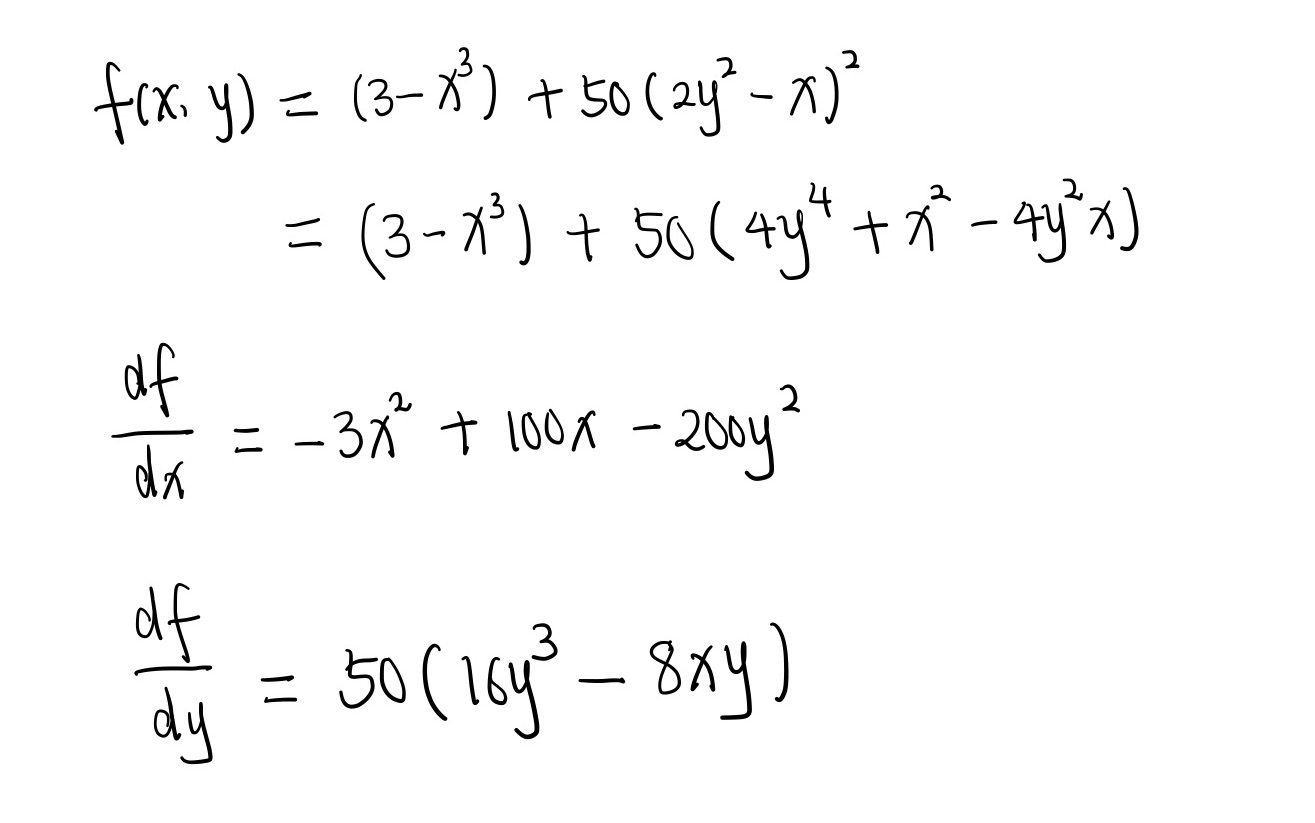

In [21]:
Image("2-1.jpg", width=300, height=300)

## Q2-2

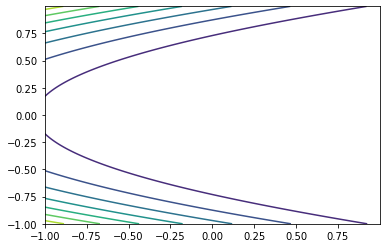

In [106]:
delta = 0.001
x = np.arange(-1.0, 1.0, delta)
y = np.arange(-1.0, 1.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*(2*Y**2 - X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

## Q2-3

In [130]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 + 100*x - 200*y**2
    df_dy = 50*(16*y**3-8*x*y)
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
        point = np.random.uniform(-1, 1, size = 2)
    else:
        point = starting_point
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
        
    return np.array(trajectory)

np.random.seed(10)
iters = 10
rate = 0.001
traj = grad_descent(iterations=iters, learning_rate=rate)

x = traj[iters-1][0]
y = traj[iters-1][1]
z = (3-x**3) + 50*(2*y**2 - x)**2
print("The minimum is {0:.4f} after {1} iterations with learning rate {2:.3f}".format(z, iters, rate))

The minimum is 2.7471 after 10 iterations with learning rate 0.001


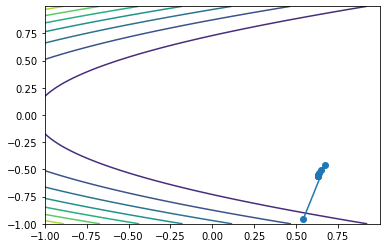

In [131]:
fig, ax = plt.subplots()
cs = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [162]:
np.random.seed(10)
iters = 10
rate = 5e-4
traj = grad_descent(iterations=iters, learning_rate=rate)

x = traj[iters-1][0]
y = traj[iters-1][1]
z = (3-x**3) + 50*(2*y**2 - x)**2
print("The minimum is {0:.4f} after {1} iterations with learning rate {2:.4f}".format(z, iters, rate))

The minimum is 2.7149 after 10 iterations with learning rate 0.0005


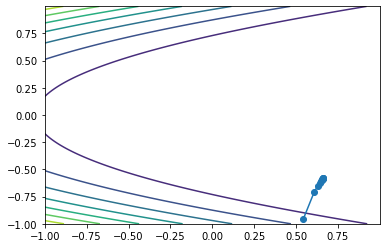

In [163]:
fig, ax = plt.subplots()
cs = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [164]:
np.random.seed(10)
iters = 10
rate = 1e-4
traj = grad_descent(iterations=iters, learning_rate=rate)

x = traj[iters-1][0]
y = traj[iters-1][1]
z = (3-x**3) + 50*(2*y**2 - x)**2
print("The minimum is {0:.4f} after {1} iterations with learning rate {2:.4f}".format(z, iters, rate))

The minimum is 11.5388 after 10 iterations with learning rate 0.0001


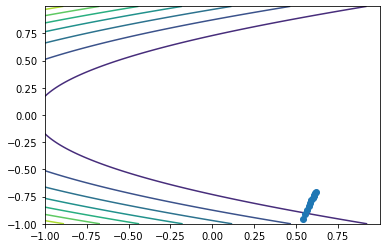

In [165]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## Q2-4

In [166]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-1, 1, size = 2)
    
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
        
    return np.array(trajectory)

np.random.seed(10)
iters = 10
rate = 5e-4
eps = 0.002
traj = grad_descent_with_momentum(iterations=iters, epsilon=eps, alpha=rate)

x = traj[iters-1][0]
y = traj[iters-1][1]
z = (3-x**3) + 50*(2*y**2 - x)**2

print("The minimum is {0:.4f} after {1} iterations with learning rate {2} and epsilon {3}".format(z, iters, rate, eps))

The minimum is 3.1242 after 10 iterations with learning rate 0.0005 and epsilon 0.002


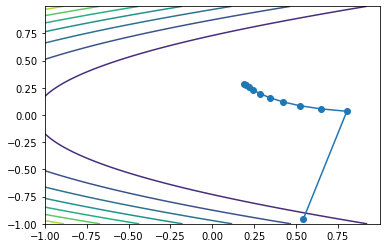

In [167]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [168]:
np.random.seed(10)
iters = 10
rate = 5e-4
eps = 0.001
traj = grad_descent_with_momentum(iterations=iters, epsilon=eps, alpha=rate)

x = traj[iters-1][0]
y = traj[iters-1][1]
z = (3-x**3) + 50*(2*y**2 - x)**2

print("The minimum is {0:.4f} after {1} iterations with learning rate {2} and epsilon {3}".format(z, iters, rate, eps))

The minimum is 2.7472 after 10 iterations with learning rate 0.0005 and epsilon 0.001


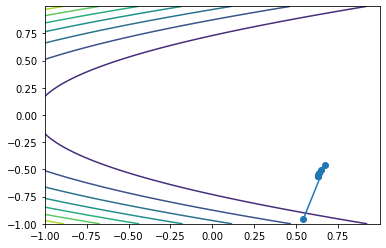

In [169]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [170]:
np.random.seed(10)
iters = 10
rate = 5e-4
eps = 5e-4
traj = grad_descent_with_momentum(iterations=iters, epsilon=eps, alpha=rate)

x = traj[iters-1][0]
y = traj[iters-1][1]
z = (3-x**3) + 50*(2*y**2 - x)**2

print("The minimum is {0:.4f} after {1} iterations with learning rate {2} and epsilon {3}".format(z, iters, rate, eps))

The minimum is 2.7148 after 10 iterations with learning rate 0.0005 and epsilon 0.0005


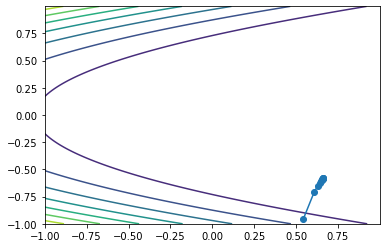

In [171]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')